In [103]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.special import factorial

In [104]:
# Define physical parameters
n_p = 0.9
n_b = 0.2
v_b = 4.5
v_t = 0.5
eta = 0.5

In [105]:
# Set up the PDF we wish to plot

def f(v):
    # Define the function to be expanded
    return (n_p/np.sqrt(2*np.pi))*np.exp(-0.5*v**2) + (n_b/np.sqrt(2*np.pi))*np.exp(-0.5*(v-v_b)**2/v_t**2) 
    #return (1/np.sqrt(2*np.pi))*np.exp(-0.5*v**2)
    #return (2*np.pi)**-0.5 * (1 + (1-eta)*(v**2-1))*np.exp(-0.5*v**2)

# Define the extent of the plot
v = np.linspace(-3*np.pi, 3*np.pi, 10000)

# Set up the degree of the expansion
degree = 200

We will here use Gauss-Hermite quadrature to perform the integrals to find the coeffiecients

\begin{equation}
a_n = \frac{1}{\pi^{1/2} 2^n n!}\int_{-\infty}^{\infty}H_n(v) f(v)e^{-v^2} dv
\end{equation}

In [106]:
from scipy.special import hermite, roots_hermite

def evaluate_coefficients(func, degree):
    # Generate the Gauss-Hermite quadrature points and weights
    points, weights = roots_hermite(degree+1)

    # Initialize the coefficients array 
    coefficients = np.zeros(degree + 1)

    # Evaluate the coefficients using the quadrature formula
    for i in range(degree + 1):
        coefficients[i] = (np.sqrt(np.pi)*2**i*factorial(i))**(-1) * np.sum(func(points) * hermite(i)(points) * weights)
    return coefficients

In [107]:
# Evaluate the coefficients
coefficients = evaluate_coefficients(f, degree)

f_exp = 0

eps = []

# Expand the function in terms of Hermite polynomials
for i in range(degree + 1):
    f_exp += coefficients[i] * hermite(i)(v)
    eps.append(np.linalg.norm(f_exp-f(v)))

/tmp/ipykernel_18015/1352662504.py:12: RuntimeWarning: overflow encountered in scalar multiply
  coefficients[i] = (np.sqrt(np.pi)*2**i*factorial(i))**(-1) * np.sum(func(points) * hermite(i)(points) * weights)
/home/u2010868/.local/lib/python3.10/site-packages/scipy/special/_orthogonal.py:1340: RuntimeWarning: overflow encountered in multiply
  hn = 2**n * _gam(n + 1) * sqrt(pi)


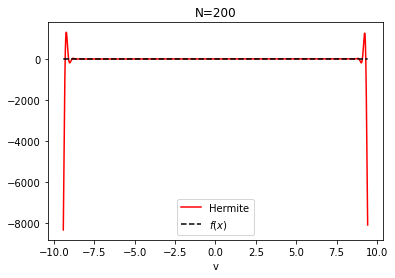

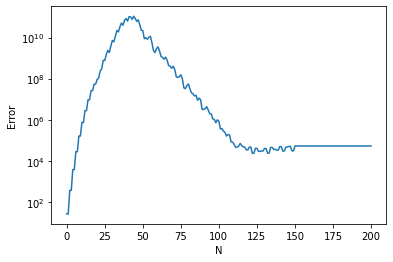

In [108]:
plt.plot(v, f_exp, label='Hermite', color='red')
plt.plot(v, f(v), label='$f(x)$', linestyle='--', color='black')
plt.title(f'N={degree}')
plt.xlabel('v')
plt.ylabel('')
plt.legend()
plt.show()

plt.plot(range(degree+1), eps)
plt.yscale('log')
plt.xlabel('N')
plt.ylabel('Error')
plt.show()

I will now try to perform the same procedure, but this time using the probabilists Hermite polynomials, with the weighting factor $e^{-v^2/2}$. That is, I will try to find the coefficients of the expansion from the integral

\begin{equation}
b_n = \frac{1}{(2\pi)^{1/2} n!}\int_{-\infty}^{\infty}He_n(v) f(v)e^{-v^2/2} dv
\end{equation}

In [109]:
from scipy.special import hermitenorm, roots_hermitenorm

def evaluate_coefficients2(func, degree):
    # Generate the Gauss-Hermite quadrature points and weights
    points, weights = roots_hermitenorm(degree+1)

    # Initialize the coefficients array 
    coefficients = np.zeros(degree + 1)

    # Evaluate the coefficients using the quadrature formula
    for i in range(degree + 1):
        coefficients[i] = (np.sqrt(2*np.pi)*factorial(i))**(-1) * np.sum(func(points) * hermitenorm(i)(points) * weights)
    return coefficients



In [110]:
# Evaluate the coefficients
coefficients = evaluate_coefficients2(f, degree)

f_exp = 0

eps = []

# Expand the function in terms of Hermite polynomials
for i in range(degree + 1):
    f_exp += coefficients[i] * hermitenorm(i)(v)
    eps.append(np.linalg.norm(f_exp-f(v)))

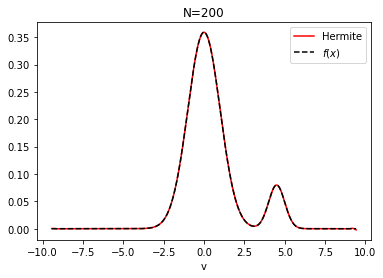

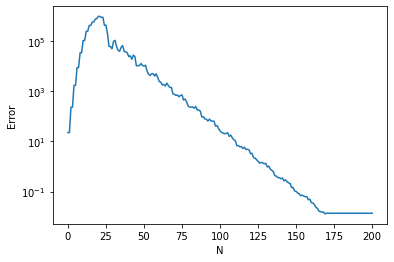

In [111]:
plt.plot(v, f_exp, label='Hermite', color='red')
plt.plot(v, f(v), label='$f(x)$', linestyle='--', color='black')
plt.title(f'N={degree}')
plt.xlabel('v')
plt.ylabel('')
plt.legend()
plt.show()

plt.plot(range(degree+1), eps)
plt.yscale('log')
plt.xlabel('N')
plt.ylabel('Error')
plt.show()